# Probability theory and descriptive statistics

In this notebook I'll try to solve a couple of exercises related to descriptive statistics.

## 1. Train-test split

The goal of this exercises it to learn how to perform a train-test split.

In [115]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

# set fig size
#plt.rcParams['figure.figsize'] = (4.8, 3)

In [116]:
# load and read data from csv
df = pd.read_csv('data/Marketing3.csv', index_col=[0])
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,5,349.41,1,1,Surburban,1,Phone,Buy One Get One,0
2,7,64.04,0,1,Rural,0,Web,Buy One Get One,1
3,2,244.82,0,1,Rural,1,Web,Buy One Get One,1
4,11,302.15,1,0,Urban,0,Web,Buy One Get One,0


In [117]:
# df shape
df.shape

(64000, 9)

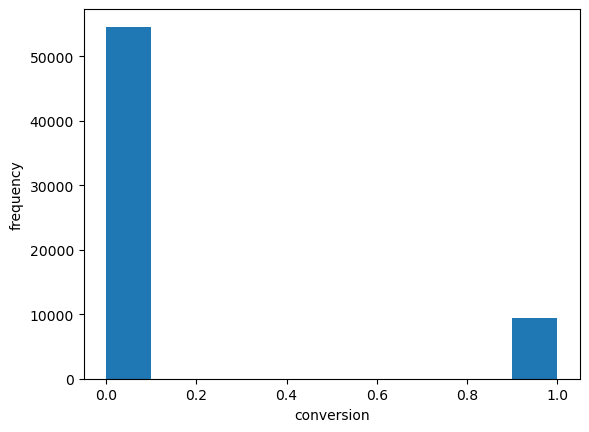

In [118]:
# histogram on coversion feature
plt.hist(df['conversion'])
plt.xlabel('conversion')
plt.ylabel('frequency')
plt.show()

### 1.1 Bernoulli distribution

**Discrete probability distribution with success/failure outcomes**

In [119]:
# proportion %
prob_conversion = df['conversion'].mean()
prob_no_conversion = 1 - prob_conversion

# output
print('P(conversion): ' + str(prob_conversion))
print('P(no conversion: ' + str(prob_no_conversion))

P(conversion): 0.14678125
P(no conversion: 0.85321875


### 1.2 Train-test split (80-20)

`.sample` is used to sample randomly (not to alter the conv/no conv distribution).

In [120]:
# random selection of 80% of df rows
train = df.sample(frac=0.8, random_state=1)

In [121]:
# drop selected train rows for test split
test = df.drop(train.index).sample(frac=1)

In [122]:
# check train-test split shape
len(df), len(train), len(test)

(64000, 51200, 12800)

### 1.3 Visual distribution check

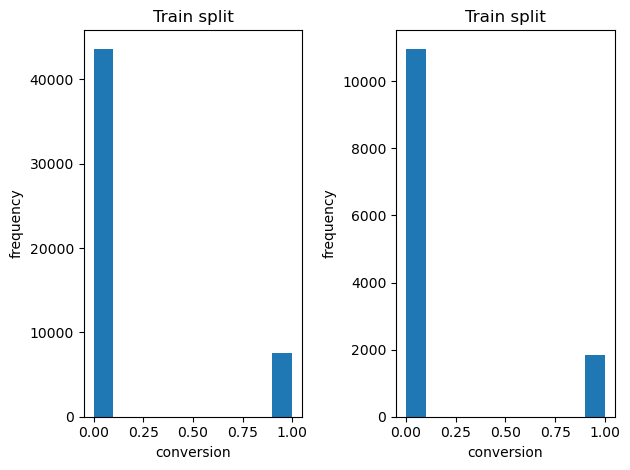

In [123]:
# figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# train plot
ax1.hist(train['conversion'])
ax1.set_ylabel('frequency')
ax1.set_xlabel('conversion')
ax1.set_title('Train split')

# test plot
ax2.hist(test['conversion'])
ax2.set_ylabel('frequency')
ax2.set_xlabel('conversion')
ax2.set_title('Train split')

# adjust subplot params to fit fig
plt.tight_layout()

# plot
plt.show()

### 1.4 Probability calculation distribution check

In [124]:
# train split
prop_conversion_train = train['conversion'].mean()
prop_no_conversion_train = 1 - prop_conversion_train

prop_conversion_train, prop_no_conversion_train

(0.14775390625, 0.85224609375)

In [125]:
# test split
prop_conversion_test = test['conversion'].mean()
prop_no_conversion_test = 1 - prop_conversion_test

prop_conversion_test, prop_no_conversion_test

(0.142890625, 0.8571093750000001)

## 2. Law of large numbers and Central Limit Theorem

In this exercise we'll demonstrate that the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed.

In [126]:
# import packages
import pandas as pd
import numpy as np

In [127]:
# load/read data from csv
df = pd.read_csv('data/OnlineRetail.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [128]:
# df shape
df.shape

(541909, 8)

### 2.1 Daily sales with datetime

In [129]:
# check df info/dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [130]:
# convert 'InvoiceDate' from object to datetime column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [131]:
# add revenue column to df
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [132]:
# revenue grouped by date
df_grouped = df.drop(['CustomerID', 'UnitPrice'], axis=1) # axis=1 -> columns
df_grouped = df_grouped.groupby('InvoiceDate').sum()
df_grouped

,Quantity,Revenue
InvoiceDate,,
2010-12-01,26814,58635.56
2010-12-02,21023,46207.28
2010-12-03,14830,45620.46
2010-12-05,16395,31383.95
2010-12-06,21419,53860.18
...,...,...
2011-12-05,44119,57751.32
2011-12-06,29026,54228.37
2011-12-07,39612,75076.22


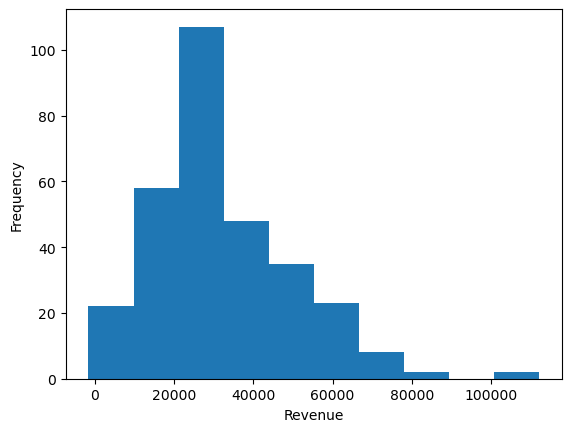

In [133]:
# df_grouped distribution visualization
plt.hist(df_grouped['Revenue'])
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.show()

### 2.2 Law of large number verification

In [134]:
# empty list average daily revenues
avg_daily_revenues = []

# for loop get mean of random sample from 2 to 300 values
for i in range (2, 300):
    avg_daily_revenues += [df_grouped.sample(n=i)['Revenue'].mean()]

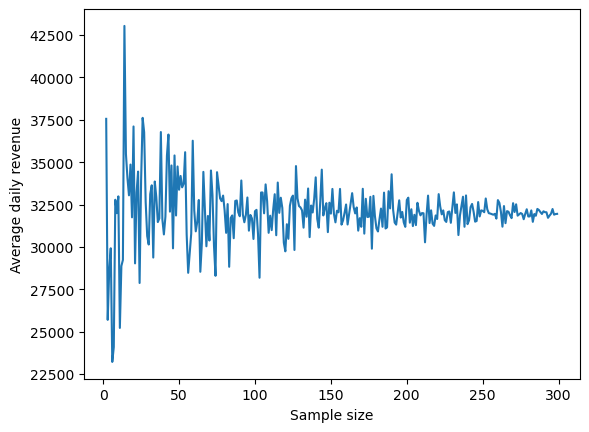

In [135]:
# avg_daily_revenues plot
plt.plot(range(2, 300), avg_daily_revenues)
plt.xlabel('Sample size')
plt.ylabel('Average daily revenue')
plt.show()

In [136]:
# as the sample size increases, the average daily revenue gets closer to the expected value.

### 2.3 Central limit theorem verification

CLT: the normalized sum of independent random variables tends towards a normal distribution as the number of independent random variables increases.

In [137]:
# 10k sample means of daily sales with sample size = 1, 10, 100
sampling_size = [1, 10, 100]
n = 10000

# create empty dataframe
df_clt = pd.DataFrame()

# for loop mean of 10k random samples of size = sampling_size
for i in range(n):
    avg_daily_revenues = [np.mean(df_grouped['Revenue'].sample(n=s)) for s in sampling_size]
    df_clt = pd.concat([df_clt, pd.DataFrame([avg_daily_revenues])])

# rename column to sampling_size list
df_clt.columns = sampling_size

# get df_clt
df_clt

,1,10,100
0,5692.07,21945.9770,33377.15770
0,33520.22,30195.1030,31412.85922
0,11623.58,30719.7750,32248.06231
0,54228.37,31844.1220,31880.12331
0,34337.29,33090.8290,31265.15692
...,...,...,...
0,10285.95,27697.7551,32887.09701
0,24565.78,32515.4930,33523.63312
0,10049.48,42415.2700,32281.06871
0,16370.27,43848.3050,31843.70690


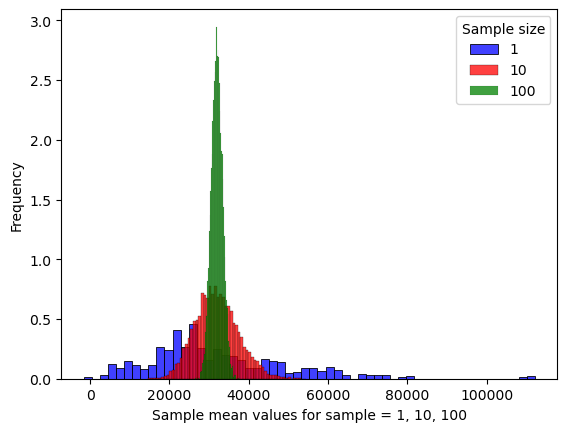

In [138]:
# CLT visualization for avg_daily_revenues with different sampling_size

# import seaborn
import seaborn as sns

# hist
sns.histplot(df_clt[1], color='blue', stat='frequency')
sns.histplot(df_clt[10], color='red', stat='frequency')
sns.histplot(df_clt[100], color='green', stat='frequency')

# labels and legend
plt.xlabel('Sample mean values for sample = 1, 10, 100')
plt.legend(labels=[1, 10, 100], title='Sample size')

# show plot
plt.show()

In [139]:
# as the sample size increases, the variance narrows down around the mean 
# and the distribution tends towards a normal distribution

# Var(X) = (σ ** 2) / n

## 3. Scaling and normalization

Scaling and normalization on the 'history' column, which is the global revenue generated by each customer.

In [140]:
# load/read data from csv
df = pd.read_csv('data/Marketing3.csv', index_col=[0])
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,5,349.41,1,1,Surburban,1,Phone,Buy One Get One,0
2,7,64.04,0,1,Rural,0,Web,Buy One Get One,1
3,2,244.82,0,1,Rural,1,Web,Buy One Get One,1
4,11,302.15,1,0,Urban,0,Web,Buy One Get One,0


### 3.1 Functions

In [145]:
# define functions

def MinMaxScaling(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def Standardize(x):
    return (x - np.mean(x)) / np.std(x)

def LogScaling(x):
    return np.log(x)

In [146]:
# apply functions to history data column

c1 = MinMaxScaling(df['history'])
c2 = Standardize(df['history'])
c3 = LogScaling(df['history'])

### 3.2 Effects on density distribution

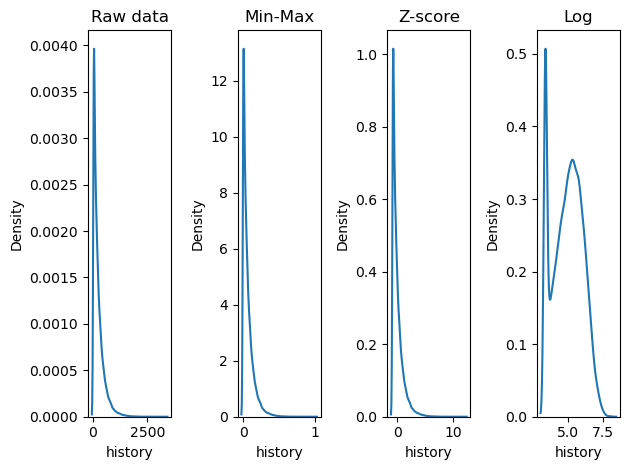

In [148]:
# create figure subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

# density kde plots
sns.kdeplot(ax=ax1, x=df['history']).set_title('Raw data')
sns.kdeplot(ax=ax2, x=c1).set_title('Min-Max')
sns.kdeplot(ax=ax3, x=c2).set_title('Z-score')
sns.kdeplot(ax=ax4, x=c3).set_title('Log')

# layout and show
plt.tight_layout()
plt.show()

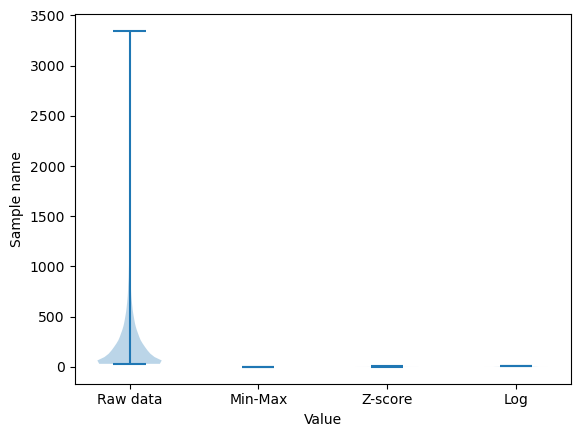

In [157]:
# violin plot
scale_data = pd.DataFrame({
                        'data': df['history'],
                        'min_max': c1,
                        'z_score': c2,
                        'log': c3})

# fig subplot and labels
fig, ax = plt.subplots(1,1)
labels = ['Raw data', 'Min-Max', 'Z-score', 'Log']

# plot
ax.violinplot([scale_data.data, scale_data.min_max, scale_data.z_score, scale_data.log])
ax.set_ylabel('Sample name')
ax.set_xlabel('Value')

# set number or labels and label names on x-axis
plt.xticks(1 + np.arange(len(labels)), labels)

# show plot
plt.show()

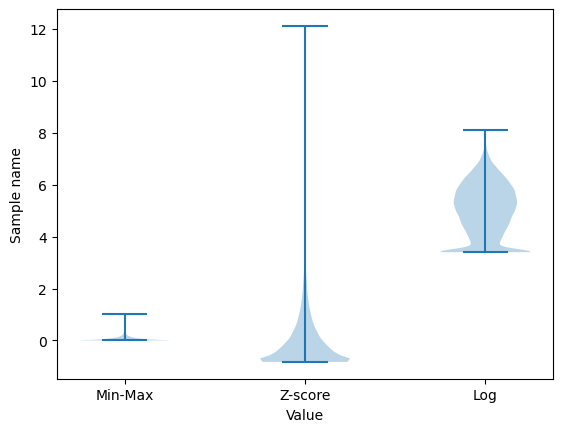

In [158]:
# comparison without 'Raw data' (too big compared to other values)
scale_data = pd.DataFrame({
                        'min_max': c1,
                        'z_score': c2,
                        'log': c3})

# fig subplot and labels
fig, ax = plt.subplots(1,1)
labels = ['Min-Max', 'Z-score', 'Log']

# plot
ax.violinplot([scale_data.min_max, scale_data.z_score, scale_data.log])
ax.set_ylabel('Sample name')
ax.set_xlabel('Value')

# set number or labels and label names on x-axis
plt.xticks(1 + np.arange(len(labels)), labels)

# show plot
plt.show()

### 3.3 Thoughts

In [160]:
# Min-max scaling ensures that all values are between 0 and 1
# Standardization (z-score) has no min/max values and results on average with values being set to 0 
# Standardization (z-score) some values will therefore become negative

## 4. Bayesian probability computation

The Bayes' law states that:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In [161]:
# load/read data
df = pd.read_csv('data/Marketing3.csv', index_col=[0])
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,5,349.41,1,1,Surburban,1,Phone,Buy One Get One,0
2,7,64.04,0,1,Rural,0,Web,Buy One Get One,1
3,2,244.82,0,1,Rural,1,Web,Buy One Get One,1
4,11,302.15,1,0,Urban,0,Web,Buy One Get One,0


### 4.1 P(conversion of a random customer)

$$P(conv) = \frac{N(conv)}{N(total)}$$

In [175]:
# number of rows
row_count = df.shape[0]

# number of conversions
conversion_count = df.groupby(['conversion']).size()[1]

# P(conversion of a random customer)
conversion_count / row_count

0.14678125

### 4.2 P(random customer has been active <6 months and converted)

$$P(conv\cap Recency<6) = \frac{N(Recency<6 \cap conv)}{N(total)}$$

In [178]:
# recency <6 months and converted (rows count)
recency6conv_count = df[(df['recency'] <= 6) & (df['conversion'] == 1)].shape[0]

# P(<6 and converted)
recency6conv_count / row_count

0.09525

### 4.3 P(conversion of customer that was active in the last 6 months)

$$P(conv|Recency<6) = \frac{P(conv \cap Recency<6)}{P(Recency<6)} = \frac{N(Recency<6 \cap conv)}{N(Recency<6)}$$

In [180]:
# P(conv|recency <6)
# probability of conversion given a recency that is less that 6 months

# recency <6 months (rows count)
recency6_count = df[df['recency'] < 6].shape[0]

# recency <6 months and converted (rows count)
recency6conv_count = df[(df['recency'] < 6) & (df['conversion'] == 1)].shape[0]

# P(conv|recency <6)
recency6conv_count / recency6_count

0.17035647279549718

### 4.4 Global conversion rate update

1. $$P(conv) = P(conv\cap rural) + P(conv\cap urban) + P(conv\cap suburban)$$

2. $$P(conv) = P(conv|rural)*P(rural) + P(conv|urban)*P(urban) + P(conv|suburban)*P(suburban)$$


3. $$P(conv) = P(conv|rural)*30\% + P(conv|urban)*50\% + P(conv|suburban)*20%$$

4. $$P(conv) = \frac{N(conv\cap rural)}{N(rural)}*30\% + \frac{N(conv|urban)}{N(urban)}*50\% + \frac{N(conv|suburban)}{N(suburban)}*20\%$$


In [186]:
# update rural 0.3, urban 0.5, suburban 0.2

# rural
N_rural_count = df[df['zip_code'] == 'Rural'].shape[0]
# conversion given rural
N_rural_conv_count = df[(df['zip_code'] == 'Rural') & (df["conversion"] == 1)].shape[0]

# urban
N_urban_count = df[df['zip_code'] == 'Urban'].shape[0]
# conversion given urban
N_urban_conv_count = df[(df['zip_code'] == 'Urban') & (df["conversion"] == 1)].shape[0]

# suburban
N_suburban_count = df[df['zip_code'] == 'Surburban'].shape[0]
# conversion given suburban
N_suburban_conv_count = df[(df['zip_code'] == 'Surburban') & (df["conversion"] == 1)].shape[0]

# updated conversion probability
P = N_rural_conv_count / N_rural_count * 0.3 + N_urban_conv_count / N_urban_count * 0.5 + N_suburban_conv_count / N_suburban_count * 0.2
P

0.15394670886762873

In [187]:
# from 0.147 to 0.153

### 4.5 Prior knowledge integration

Let's say that our model predicts from the features (columns) whether a marketing sollicitation is going to result in a conversion. Here are the counts for the test phase:

|                          | Customers that converted | Customers that did not convert |
|--------------------------|-----------------|---------------------|
| Predicted: conv = 1  | 100             | 10                  |
| Predicted: conv = 0  | 4               | 1000                |

$$P(conv|conv_{pred}) = \frac{P(conv_{pred}|conv)P(conv)}{P(conv_{pred})}$$

In [190]:
p_convpred_given_conv = 100/(100+4)
p_conv = 104/1114
p_convpred = 110/1114

p_conv_given_convpred = p_convpred_given_conv * p_conv / p_convpred
p_conv_given_convpred

0.9090909090909091

In [192]:
# what if historically the probability of conversion was 5% instead of 104/1114?
p_conv_new = 5/100

p_conv_given_convpred_new = p_convpred_given_conv * p_conv_new / p_convpred
p_conv_given_convpred_new

0.4868881118881119

The probability drops to 0.49 when combining the knowledge extracted from the model with an additional extenal input on the historical probability of conversion.